In [120]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

## Load Files

In [210]:
# load CSV of championship results into a dataframe and display first 10 records

championship_df = pd.read_csv("resources/yh-championship-data.csv")
championship_df.head(10)

,Year,Division,Horse,OverallPlacing,HighestLevel,CDI,USDFNumber,OverallScore
0,2002,FEI5,Rosabella,1,Third Level,No,37232,7.84
1,2002,FEI5,Favereux,2,Grand Prix,No,38714,7.68
2,2002,FEI5,Devon,3,Third Level,No,38984,7.42
3,2002,FEI5,Welfenstein,4,Grand Prix,Yes,40474,7.14
4,2002,FEI5,R-tistik,5,Grand Prix,Yes,37123,7.10
5,2002,FEI5,Pampero,6,FEI 5 Year Old,No,41386,6.82
6,2002,FEI6,Oleander,1,Grand Prix,Yes,35062,8.24
7,2002,FEI6,Freestyle,2,Prix St. Georges,No,39380,7.40
8,2002,FEI6,Wincenzo,3,Prix St. Georges,No,1026740,7.00
9,2002,FEI6,Olympus,4,Grand Prix,Yes,42683,6.86


In [44]:
# load CSV of horse data into a dataframe and display first 10 results

horse_df = pd.read_csv("resources/yh-horse-data.csv")
horse_df.head(10)


,Horse,HighestLevel,CDI,USDFNumber,Sire,Damsire,Country,Breeder,Studbook,InternationalTeam,TeamMade
0,Rosabella,Third Level,No,37232,Rohdiamant,Watzmann,Germany,Kerstin Ohlemeyer,Hanoverian,No,NaN
1,Favereux,Grand Prix,No,38714,Fidermark,Fidelio,Germany,Johannes Hilgers,Rhinelander,No,NaN
2,Devon,Third Level,No,38984,Don Gregory,NaN,NaN,NaN,Oldenburg,No,NaN
3,Welfenstein,Grand Prix,Yes,40474,Wolkenstein II,Lauries Crusador xx,Germany,Heinz Bruns,Hanoverian,No,NaN
4,R-tistik,Grand Prix,Yes,37123,Ramires,Rex Fritz,Germany,Josef Kathmann,Oldenburg,No,NaN
5,Pampero,FEI 5 Year Old,No,41386,Ferro,NaN,USA,Margaret Avery,KWPN,No,NaN
6,Oleander,Grand Prix,Yes,35062,Jazz,Ulft,Netherlands,R. Van Wourdenbergh,KWPN,No,NaN
7,Freestyle,Prix St. Georges,No,39380,Florestan I,Parademarsch I,Germany,NaN,Westfalen,No,NaN
8,Wincenzo,Prix St. Georges,No,1026740,Werther,Graphit,Germany,NaN,Hanoverian,No,NaN
9,Olympus,Grand Prix,Yes,42683,Clavecimbel,NaN,Netherlands,G. Van Der Veen,KWPN,No,NaN


In [61]:
# create merged dataframe, drop and rename extra columns

merged_df = pd.merge(championship_df, horse_df, on='USDFNumber')
merged_df = merged_df.drop(columns =['Horse_y', 'HighestLevel_x', 'CDI_y'])
merged_df = merged_df.rename(columns={'Horse_x': 'Horse', 'CDI_x': 'CDI', 'HighestLevel_y': 'HighestLevel'})
merged_df.head(10) 

,Year,Division,Horse,OverallPlacing,CDI,USDFNumber,OverallScore,HighestLevel,Sire,Damsire,Country,Breeder,Studbook,InternationalTeam,TeamMade
0,2002,FEI5,Rosabella,1,No,37232,7.84,Third Level,Rohdiamant,Watzmann,Germany,Kerstin Ohlemeyer,Hanoverian,No,NaN
1,2002,FEI5,Favereux,2,No,38714,7.68,Grand Prix,Fidermark,Fidelio,Germany,Johannes Hilgers,Rhinelander,No,NaN
2,2002,FEI5,Devon,3,No,38984,7.42,Third Level,Don Gregory,NaN,NaN,NaN,Oldenburg,No,NaN
3,2002,FEI5,Welfenstein,4,Yes,40474,7.14,Grand Prix,Wolkenstein II,Lauries Crusador xx,Germany,Heinz Bruns,Hanoverian,No,NaN
4,2002,FEI5,R-tistik,5,Yes,37123,7.10,Grand Prix,Ramires,Rex Fritz,Germany,Josef Kathmann,Oldenburg,No,NaN
5,2002,FEI5,Pampero,6,No,41386,6.82,FEI 5 Year Old,Ferro,NaN,USA,Margaret Avery,KWPN,No,NaN
6,2002,FEI6,Oleander,1,Yes,35062,8.24,Grand Prix,Jazz,Ulft,Netherlands,R. Van Wourdenbergh,KWPN,No,NaN
7,2002,FEI6,Freestyle,2,No,39380,7.40,Prix St. Georges,Florestan I,Parademarsch I,Germany,NaN,Westfalen,No,NaN
8,2002,FEI6,Wincenzo,3,No,1026740,7.00,Prix St. Georges,Werther,Graphit,Germany,NaN,Hanoverian,No,NaN
9,2002,FEI6,Olympus,4,Yes,42683,6.86,Grand Prix,Clavecimbel,NaN,Netherlands,G. Van Der Veen,KWPN,No,NaN


In [4]:
# get count of null values by column for horse dataframe

horse_df.isnull().sum(axis = 0)

Horse            0
HighestLevel     0
CDI              0
USDFNumber       0
Sire             1
Damsire         18
Country          8
Breeder         47
Studbook         1
dtype: int64

In [32]:
# get count of null values by column for championship dataframe

championship_df.isnull().sum(axis = 0)

Year              0
Division          0
Horse             0
OverallPlacing    0
HighestLevel      0
CDI               0
USDFNumber        0
OverallScore      0
dtype: int64

## Analysis of Competitive Outcomes, 2002-2019

In [5]:
# get the total number of horses that competed in the 4/5/6 year old divisions from 2002-2019

total_horses = championship_df.loc[(championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
total_horses = total_horses["USDFNumber"].nunique()

print(f"The total number of horses competing from 2002-2019 is {total_horses}.")

The total number of horses competing from 2002-2019 is 520.


In [6]:
# get the overall number of horses that have competed in at least one CDI (any level other than Young Horse divisions)
# from 2002-2019, that competed in the 4/5/6/ year old divisions during those years

cdi_horses = championship_df.loc[(championship_df["CDI"] == "Yes") & (championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
cdi_horses = cdi_horses["USDFNumber"].nunique()


print(f"The number of CDI competitors is {cdi_horses}.")

The number of CDI competitors is 169.


In [8]:
# get the overall percentage of horses that competed in at least one CDI 

cdi_percentage = (cdi_horses / total_horses) * 100
cdi_percentage = round(cdi_percentage, 2)

print(f"The percentage of CDI competitors is {cdi_percentage}%")

The percentage of CDI competitors is 32.5%


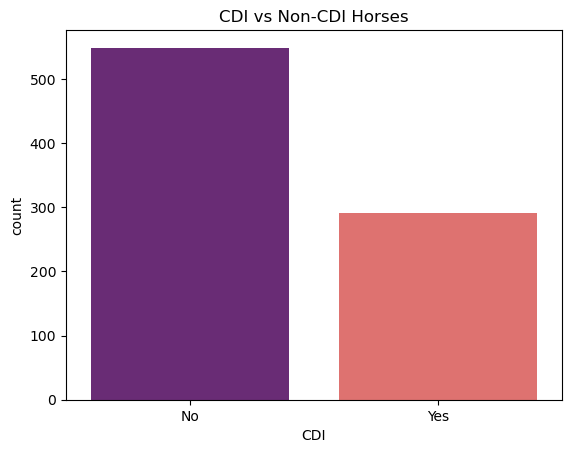

In [213]:
sns.countplot(
   x = 'CDI',
   data = horse_df,
   palette = 'magma',
   order = horse_df["CDI"].value_counts().index
)

plt.title("CDI vs Non-CDI Horses")
plt.show()

In [9]:
# get the number of horses that competed to Grand Prix from 2002-2019, 
# that competed in the 4/5/6/ year old divisions during those years

grandprix_horses = championship_df.loc[(championship_df["HighestLevel"] == "Grand Prix") & (championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
grandprix_horses = grandprix_horses["USDFNumber"].nunique()


print(f"The number of Grand Prix horses is {grandprix_horses}.")

The number of Grand Prix horses is 138.


In [10]:
# get the percentage of all horses that competed at Grand Prix, from 2002-2019,
# that competed in the 4/5/6 year old divisions during those years

grand_prix_percentage = (grandprix_horses / total_horses) * 100
grand_prix_percentage = round(grand_prix_percentage, 2)

print(f"The percentage of Grand Prix horses is {grand_prix_percentage}%.")

The percentage of Grand Prix horses is 26.54%.


In [41]:
# get the horses that have competed at FEI (Prix St. Georges and above) from 2002-2019

levels = ['Grand Prix', 'I-2', 'I-A', 'I-B', 'I-1', 'Prix St. Georges','FEI Junior']

fei_df = championship_df[(championship_df['HighestLevel'].isin(levels)) & (championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
fei_df = fei_df["USDFNumber"].nunique()

print(f"The number of horses that competed at FEI is {fei_df}.")

The number of horses that competed at FEI is 363.


In [15]:
# get the percentage of FEI horses that competed at Grand Prix, from 2002-2019,
# that competed in the 4/5/6 year old divisions during those years

fei_percentage = (fei_df / total_horses) * 100
fei_percentage = round(fei_percentage, 2)
print(f"The percentage of horses that competed at FEI is {fei_percentage}%.")

The percentage of horses that competed at FEI is 69.81%.


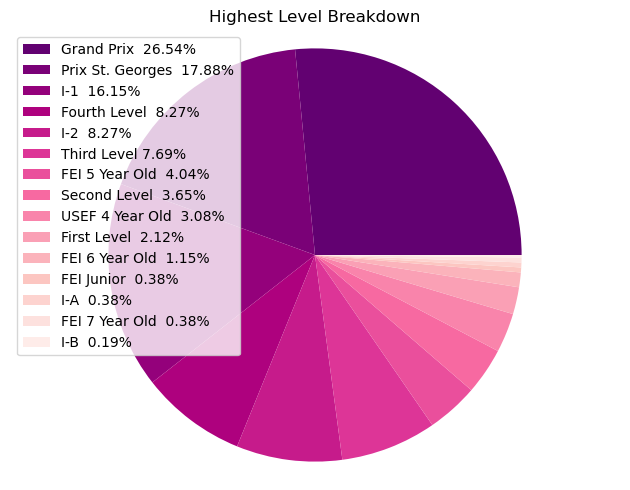

In [212]:
all_level_groups = championship_df[(championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
all_level_groups = all_level_groups.drop_duplicates(subset=['USDFNumber'])
all_level_count = all_level_groups["HighestLevel"].value_counts()
all_level_labels = ['Grand Prix  26.54%', 'Prix St. Georges  17.88%', 'I-1  16.15%', 'Fourth Level  8.27%', 'I-2  8.27%', 'Third Level 7.69%', 'FEI 5 Year Old  4.04%', 
'Second Level  3.65%', 'USEF 4 Year Old  3.08%', 'First Level  2.12%', 'FEI 6 Year Old  1.15%', 'FEI Junior  0.38%', 'I-A  0.38%', 'FEI 7 Year Old  0.38%', 'I-B  0.19%']


palette_color = sns.color_palette('RdPu_r', 15)
colors = []

patches, colors = plt.pie(all_level_count, colors=palette_color)
plt.legend(patches,all_level_labels, loc='upper left')
plt.axis('equal')
plt.tight_layout()
plt.title("Highest Level Breakdown")
plt.show()

In [211]:
all_level_count

Grand Prix          138
Prix St. Georges     93
I-1                  84
Fourth Level         43
I-2                  43
Third Level          39
FEI 5 Year Old       21
Second Level         19
USEF 4 Year Old      16
First Level          11
FEI 6 Year Old        6
FEI Junior            2
I-A                   2
FEI 7 Year Old        2
I-B                   1
Name: HighestLevel, dtype: int64

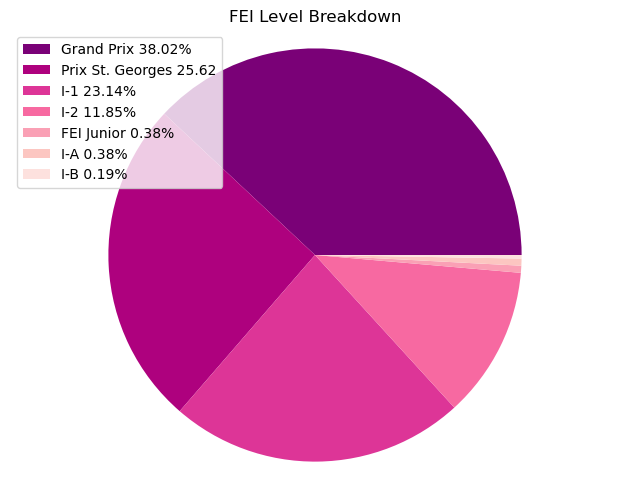

In [206]:
fei_level_groups = championship_df[(championship_df['HighestLevel'].isin(levels)) & (championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
fei_level_groups = fei_level_groups.drop_duplicates(subset=['USDFNumber'])
fei_level_count = fei_level_groups["HighestLevel"].value_counts()
fei_labels = ['Grand Prix 38.02%', 'Prix St. Georges 25.62', 'I-1 23.14%', 'I-2 11.85%','FEI Junior 0.38%', 'I-A 0.38%', 'I-B 0.19%']


palette_color = sns.color_palette('RdPu_r', 7)
colors = []

patches, colors = plt.pie(fei_level_count, colors=palette_color)
plt.legend(patches,fei_labels, loc='upper left')
plt.axis('equal')
plt.tight_layout()
plt.title("FEI Level Breakdown")
plt.show()

In [65]:
# get a list of the horses that went on to make an international team (Pan American or Olympic Games)
# that competed in the 4/5/6 year old divisions from 2002-2019

team_df = merged_df[(merged_df["Year"] <= 2019) & (merged_df["InternationalTeam"] == "Yes") &
                             (merged_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
team_df = team_df.drop_duplicates(subset='USDFNumber')
team_df = team_df[['Horse', 'TeamMade']]

print(team_df)

            Horse                              TeamMade
166     Grandioso                    Pan American Games
238     Selten HW                         Olympic Games
399        Sanceo  Olympic Games and Pan American Games
633  Lucky Strike                    Pan American Games


In [70]:
# get the count of team horses

team_count = len(team_df)

# get the percentage of team horses

team_percentage = (team_count / total_horses) * 100
team_percentage = round(team_percentage, 2)

print(f"The percentage of horses that made an international team is {team_percentage}%")

The percentage of horses that made an international team is 0.77%


In [71]:
# create summary table of overall horse level statistics

horse_summary = pd.DataFrame({"Total Horses": [total_horses], "Total FEI Horses": fei_df,
                            "Percentage of FEI Horses": fei_percentage, 
                            "Total CDI Horses": cdi_horses,
                            "Percentage of CDI Horses": cdi_percentage,
                            "Total Grand Prix Horses": grandprix_horses,
                            "Percentage of Grand Prix Horses": grand_prix_percentage,
                            "Total Team Horses": team_count,
                            "Percentage of Team Horses": team_percentage})


horse_summary

,Total Horses,Total FEI Horses,Percentage of FEI Horses,Total CDI Horses,Percentage of CDI Horses,Total Grand Prix Horses,Percentage of Grand Prix Horses,Total Team Horses,Percentage of Team Horses
0,520,363,69.81,169,32.5,138,26.54,4,0.77


In [380]:
# get the number of FEI horses that placed in the top 10 of their division at the championships between 2002-2019

placing = [1,2,3,4,5,6,7,8,9,10]
levels = ['Grand Prix', 'I-2', 'I-A', 'I-B', 'I-1', 'Prix St. Georges','FEI Junior']

top_ten = championship_df[(championship_df['OverallPlacing'].isin(placing)) & (championship_df['HighestLevel'].isin(levels))
                          & (championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]

top_ten = top_ten["USDFNumber"].nunique()

print(f"{top_ten} horses placed in the top 10 of their division.")




280 horses placed in the top 10 of their division.


In [381]:
# get the number of FEI horses that placed in the bottom 10 of their division between 2002-2019

lower_placing = [11,12,13,14,15,16,17,18,19,20]
levels = ['Grand Prix', 'I-2', 'I-A', 'I-B', 'I-1', 'Prix St. Georges','FEI Junior']

bottom_ten = championship_df[(championship_df['OverallPlacing'].isin(lower_placing)) & (championship_df['HighestLevel'].isin(levels))
                          & (championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]

bottom_ten = bottom_ten["USDFNumber"].nunique()

print(f"{bottom_ten} horses placed in the bottom 10 of their division.")

111 horses placed in the bottom 10 of their division.


In [382]:
# get the percentage of FEI horses in the top ten of their division

top_ten_percentage = (top_ten / fei_df) * 100
top_ten_percentage = round(top_ten_percentage, 2)

print(f"The percentage of horses placing in the top ten of their division is {top_ten_percentage}%.")

The percentage of horses placing in the top ten of their division is 77.13%.


In [383]:
# get the percentage of FEI horses in the top ten of their division

bottom_ten_percentage = (bottom_ten / fei_df) * 100
bottom_ten_percentage = round(bottom_ten_percentage, 2)

print(f"The percentage of horses placing in the top ten of their division is {bottom_ten_percentage}%.")

The percentage of horses placing in the top ten of their division is 30.58%.


## Analysis of Scores by Division, 2002-2023

In [118]:
# get the median scores by division over all years (2002-2023)

score_groups = championship_df.groupby(["Division","Year"])["OverallScore"]

score_group_count = championship_df.groupby(["Division","Year"])["OverallScore"].count()

# create a dataframe of summary statistics for all divisions over all years

score_summary = pd.DataFrame({"Number of Scores": score_group_count,
                             "Mean Score": score_groups.mean(),
                              "Median Score": score_groups.median(),
                              "Standard Deviation": score_groups.std(),
                              "Variance": score_groups.var()}) 

score_summary


Number of Scores  Mean Score  Median Score  Standard Deviation  \
Division Year                                                                   
DHGP     2012                 9   62.900778       62.2710            4.718424   
         2013                 6   62.858500       64.8870            4.517454   
         2014                 7   65.694857       64.3310            3.007413   
         2015                 9   65.438556       64.5050            2.410047   
         2016                 8   62.991375       62.9435            2.863786   
...                         ...         ...           ...                 ...   
USEF4    2019                14    7.695714        7.5830            0.335847   
         2020                15    7.971933        7.9200            0.328262   
         2021                15    7.901133        7.7520            0.394513   
         2022                13    7.791846        8.0360            1.537399   
         2023                16    7.755500        8.0180            1.374383   

                Variance  
Division Year             
DHGP     2012  22.263520  
         2013  20.407394  
         2014   9.044533  
         2015   5.808326  
         2016   8.201267  
...                  ...  
USEF4    2019   0.112793  
         2020   0.107756  
         2021   0.155641  
         2022   2.363596  
         2023   1.888928  

[93 rows x 5 columns]

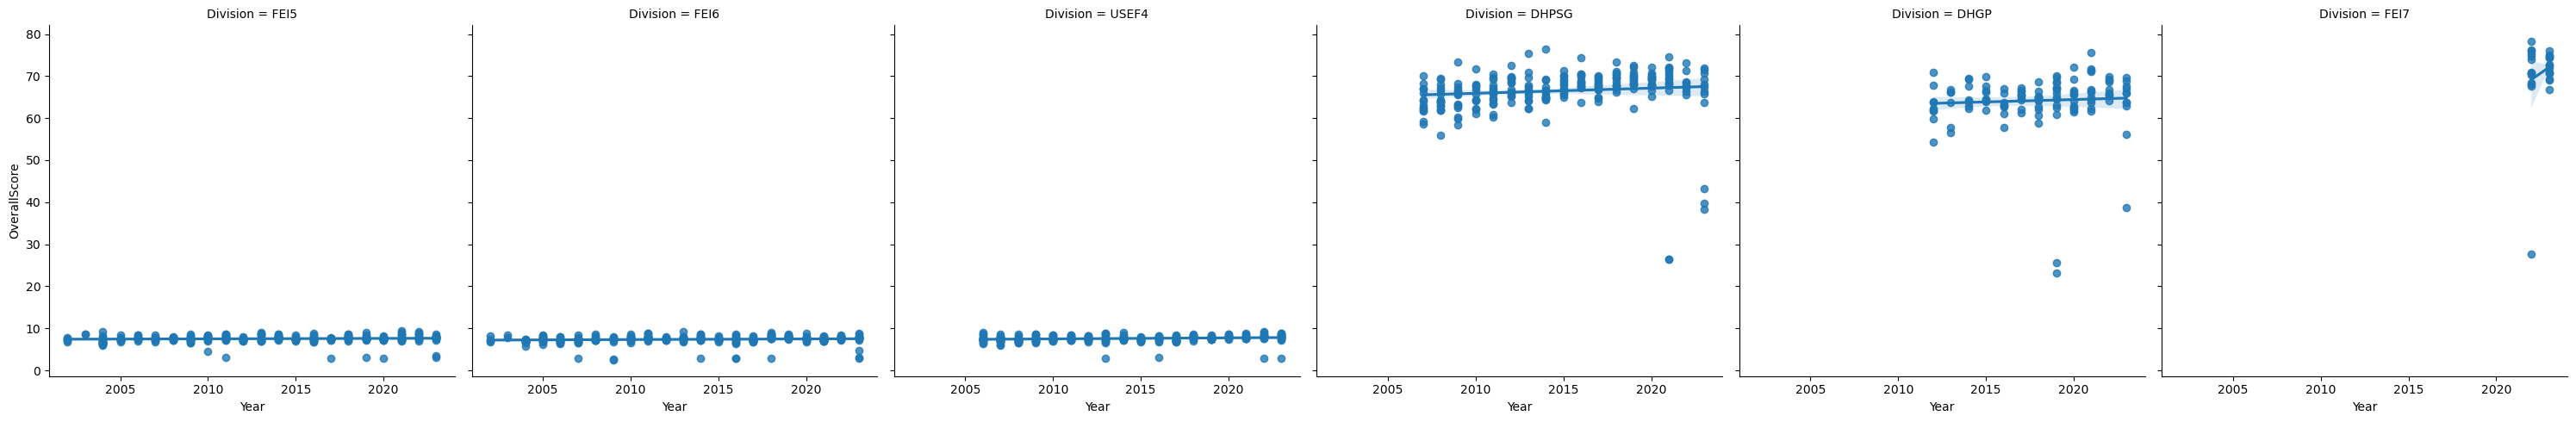

In [123]:
sns.lmplot(data=championship_df, x="Year", y="OverallScore", col="Division")

## Bloodline and Breeding Data Analysis, 2002-2023

In [100]:
# get the number of horses bred in the USA that competed in the years 2002-2023

usa_count = horse_df[(horse_df["Country"] == "USA")].count()["USDFNumber"]

print(f"{usa_count} horses were bred in the USA.")

307 horses were bred in the USA.


In [116]:
country_groups = horse_df.groupby("Country")["USDFNumber"].count()
country_groups




Country
Australia          1
Belgium            7
Brazil             1
Canada             7
Colombia           1
Denmark           26
France             1
Germany          299
Great Britain      5
Italy              1
Netherlands      165
Norway             4
Portugal           1
Spain              5
Sweden             2
USA              307
Name: USDFNumber, dtype: int64

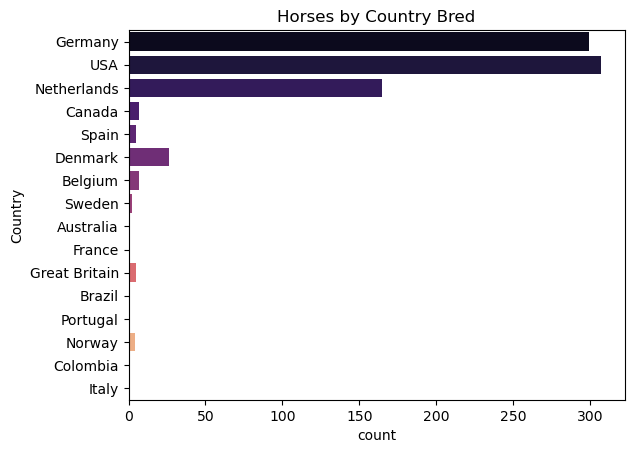

In [148]:
sns.countplot(
   y = 'Country',
   data = horse_df,
   palette = 'magma'
)

plt.title("Horses by Country Bred")
plt.show()

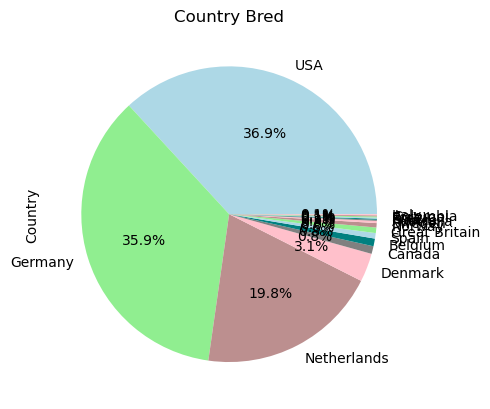

In [96]:
#all_horses = len(horse_df)
#other_countries_count = all_horses - usa_count 



usa_count2 = horse_df["Country"].value_counts()
usa_count2

usa_count2.plot(
 kind = "pie",
    autopct = "%1.1f%%",
    colors = ["lightblue", "lightgreen", "rosybrown", "pink", "gray", "teal"]
)

plt.title("Country Bred")
plt.show() 

 


In [29]:
# get the percentage of horses bred in the USA

all_horses = len(horse_df)
usa_percentage = (usa_count / all_horses) * 100
usa_percentage = round(usa_percentage, 2)

print(f"The percentage of horses bred in the USA is {usa_percentage}%.")

The percentage of horses bred in the USA is 36.5%


In [23]:
# get the top ten sires represented over all years (2002-2023)
# showing 11 horses, as there are three horses tied for the 9th place spot

top_sires = horse_df['Sire'].value_counts().head(11)

print(top_sires)


Sandro Hit          24
Sir Donnerhall I    18
Furstenball         17
Jazz                13
Rotspon             12
Fidertanz           12
Florestan I         12
Hotline             10
Sir Sinclair         9
Florencio I          9
Grand Galaxy Win     9
Name: Sire, dtype: int64

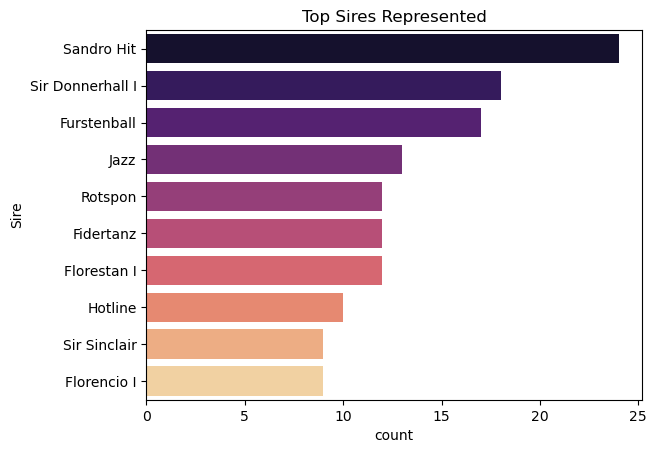

In [134]:
sns.countplot(
   y = 'Sire',
   data = horse_df,
   palette = 'magma',
   order = horse_df["Sire"].value_counts().iloc[:10].index
)

plt.title("Top Sires Represented")
plt.show()

In [24]:
# get the top ten sires of Grand Prix horses from 2002-2023

gp_sires = horse_df.loc[(horse_df["HighestLevel"] == "Grand Prix")]
gp_sires = gp_sires['Sire'].value_counts().head(10)

print(gp_sires)

Sandro Hit          12
Jazz                 8
Sir Donnerhall I     7
Florestan I          5
Florencio I          5
Fidertanz            4
Quaterback           4
Rotspon              4
Belissimo M          4
Furstenball          3
Name: Sire, dtype: int64

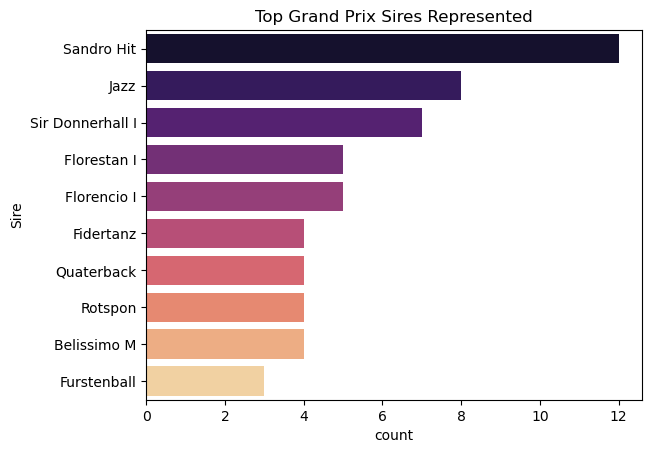

In [142]:
gp_sire_group = horse_df.loc[(horse_df["HighestLevel"] == "Grand Prix")]

sns.countplot(
   y = gp_sire_group['Sire'],
   data = gp_sire_group,
   palette = 'magma',
   order = gp_sire_group["Sire"].value_counts().iloc[:10].index
)

plt.title("Top Grand Prix Sires Represented")
plt.show()

In [372]:
# get the top ten damsires represented over all years (2002 - 2023)

top_damsires = horse_df['Damsire'].value_counts().head(10)

print(top_damsires)

Rubinstein          25
De Niro             18
Sandro Hit          17
Jazz                16
Rotspon             16
Weltmeyer           14
Ferro               13
Krack C             11
Sir Donnerhall I    11
Rohdiamant          11
Name: Damsire, dtype: int64

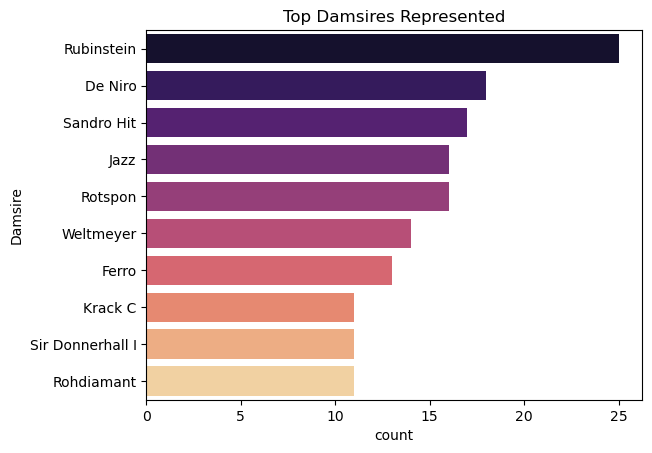

In [143]:
sns.countplot(
   y = 'Damsire',
   data = horse_df,
   palette = 'magma',
   order = horse_df["Damsire"].value_counts().iloc[:10].index
)

plt.title("Top Damsires Represented")
plt.show()

In [374]:
# get the top ten damsires of Grand Prix horses from 2002-2023

gp_damsires = horse_df.loc[(horse_df["HighestLevel"] == "Grand Prix")]
gp_damsires = gp_damsires['Damsire'].value_counts().head(10)

print(gp_damsires)

De Niro           7
Rubinstein        6
Rotspon           6
Brentano II       5
Ferro             5
Weltmeyer         4
Rohdiamant        4
Jazz              4
Flemmingh         3
Wolkenstein II    3
Name: Damsire, dtype: int64

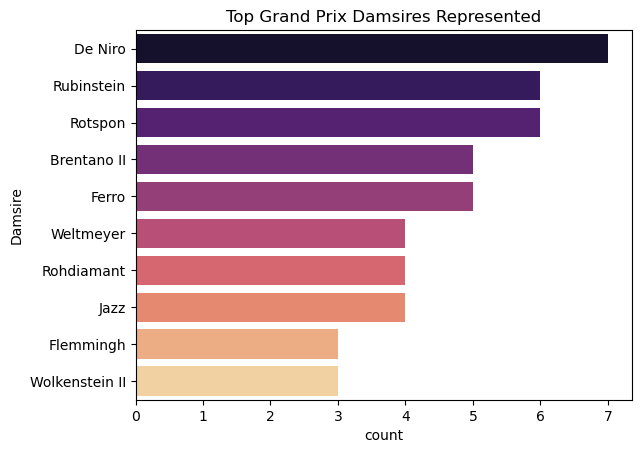

In [141]:
gp_damsire_group = horse_df.loc[(horse_df["HighestLevel"] == "Grand Prix")]

sns.countplot(
   y = gp_damsire_group['Damsire'],
   data = gp_damsire_group,
   palette = 'magma',
   order = gp_damsire_group["Damsire"].value_counts().iloc[:10].index
)

plt.title("Top Grand Prix Damsires Represented")
plt.show()

In [364]:
# get the top ten most prominent breeders represented over all years (2002 - 2023)

top_breeders = horse_df['Breeder'].value_counts().head(10)

print(top_breeders)

DG Bar Ranch          16
Maryanna Haymon       12
Nancy Holowesko        9
Leatherdale Farms      7
Gestut Lewitz          6
Oak Hill Ranch         6
Judy Yancey            6
Horses Unlimited       6
Jackie Ahl-Eckhaus     5
Maurine Swanson        5
Name: Breeder, dtype: int64

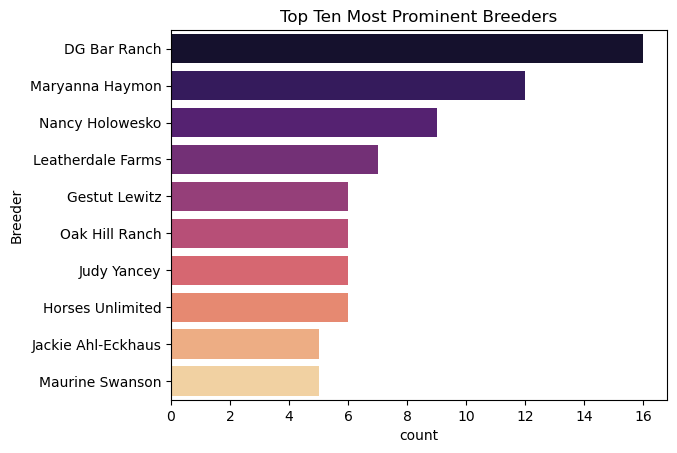

In [144]:
sns.countplot(
   y = 'Breeder',
   data = horse_df,
   palette = 'magma',
   order = horse_df["Breeder"].value_counts().iloc[:10].index
)

plt.title("Top Ten Most Prominent Breeders")
plt.show()

In [366]:
# get the top ten countries that horses were bred in over all years (2002 - 2023)

top_countries = horse_df['Country'].value_counts().head(10)

print(top_countries)

USA              307
Germany          299
Netherlands      165
Denmark           26
Canada             7
Belgium            7
Spain              5
Great Britain      5
Norway             4
Sweden             2
Name: Country, dtype: int64

In [40]:
# get the top ten studbooks represented over all years (2002 - 2023)

top_studbooks = horse_df['Studbook'].value_counts().head(10)

print(top_studbooks)

KWPN                  243
Hanoverian            241
Oldenburg             180
Westfalen              48
Danish Warmblood       34
Rhinelander            18
American Warmblood     10
PRE                     7
Holsteiner              7
Swedish Warmblood       6
Name: Studbook, dtype: int64


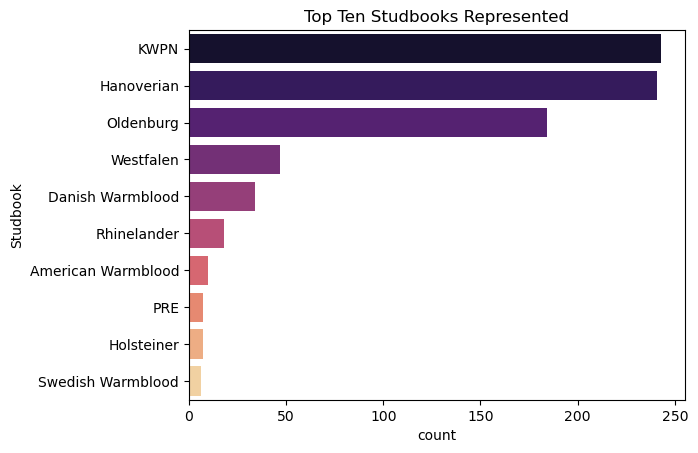

In [145]:
sns.countplot(
   y = 'Studbook',
   data = horse_df,
   palette = 'magma',
   order = horse_df["Studbook"].value_counts().iloc[:10].index
)

plt.title("Top Ten Studbooks Represented")
plt.show()

In [368]:
# get the top horses with the most championship appearances over all years (2002 - 2023)

most_appearances = championship_df['Horse'].value_counts().head(10)

print(most_appearances)

WakeUp                  6
Quantum Jazz            5
Flavius MF              5
Sole Mio                5
Sternlicht Hilltop      5
Floretienne             5
Pikko del Cerro HU      5
Fashion Designer OLD    5
Don Cesar               5
Au Revoir               5
Name: Horse, dtype: int64

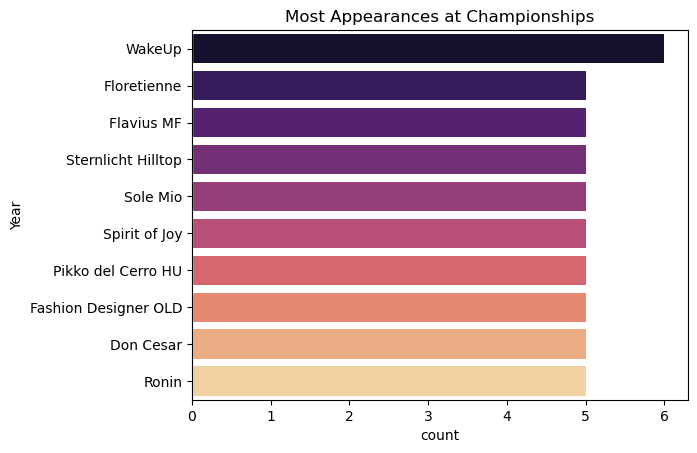

In [147]:
sns.countplot(
   y = 'Horse',
   data = championship_df,
   palette = 'magma',
   order = championship_df["Horse"].value_counts().iloc[:10].index
)

plt.title("Most Appearances at Championships")
plt.show()